In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv(r"R:\JN\full pipeline\diabetic_prediction_dataset_v2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diabetes_Status          1000 non-null   int64  
 1   Diet_Quality             1000 non-null   object 
 2   Physical_Activity_Level  1000 non-null   object 
 3   Smoking_Status           1000 non-null   object 
 4   Family_History           1000 non-null   object 
 5   Glucose_Level            1000 non-null   float64
 6   Insulin_Level            1000 non-null   float64
 7   BMI                      1000 non-null   float64
 8   Age                      1000 non-null   int64  
 9   HbA1c                    1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [4]:
df.describe(include='all')

,Diabetes_Status,Diet_Quality,Physical_Activity_Level,Smoking_Status,Family_History,Glucose_Level,Insulin_Level,BMI,Age,HbA1c
count,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.00000,1000
unique,NaN,4,3,3,2,NaN,NaN,NaN,NaN,602
top,NaN,Good,Low,Non-Smoker,Yes,NaN,NaN,NaN,NaN,???
freq,NaN,271,348,337,516,NaN,NaN,NaN,NaN,200
mean,0.486000,NaN,NaN,NaN,NaN,140.156557,17.178389,26.833181,51.06900,NaN
std,0.500054,NaN,NaN,NaN,NaN,47.672271,10.894508,5.843772,19.21498,NaN
min,0.000000,NaN,NaN,NaN,NaN,50.146196,-7.448900,8.580960,18.00000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,100.184430,8.952097,22.932459,34.00000,NaN
50%,0.000000,NaN,NaN,NaN,NaN,129.064609,14.447877,26.808189,52.00000,NaN
75%,1.000000,NaN,NaN,NaN,NaN,179.547667,24.411136,30.881335,68.00000,NaN


In [5]:
df.value_counts()

Diabetes_Status  Diet_Quality  Physical_Activity_Level  Smoking_Status  Family_History  Glucose_Level  Insulin_Level  BMI        Age  HbA1c             
1                Poor          Moderate                 Non-Smoker      Yes             223.205010      15.949116     21.941000  46   Unknown               1
0                Average       High                     Current Smoker  No              99.414853       19.075613     43.664165  58   Unknown               1
                                                                                        109.369328      5.140772      30.117497  75   6.258096840678736     1
                                                                                        111.999644     -1.127891      25.024263  55   4.701072449741753     1
                                                                                        112.881980      4.734035      18.412369  19   5.6498491463856       1
                                                         

# Preprocessing Pipeline

In [6]:
cat_col=['gender','smoking_history']
num_col=['age','bmi','HbA1c_level','blood_glucose_level']

In [7]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)




categorical_transformer=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
]
)

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,num_col),
        ('cat',categorical_transformer,cat_col)
    ],remainder='passthrough',force_int_remainder_cols=False
)

In [8]:
preprocessor


ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'HbA1c_level',
                                  'blood_glucose_level']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'smoking_history'])])

In [9]:
print(df.columns)

Index(['Diabetes_Status', 'Diet_Quality', 'Physical_Activity_Level',
       'Smoking_Status', 'Family_History', 'Glucose_Level', 'Insulin_Level',
       'BMI', 'Age', 'HbA1c'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X=df.drop(columns=['Diabetes_Status'])
Y=df['Diabetes_Status']

## Spiliting Data

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,random_state=42)

In [12]:
print(len(X_train),len(X_test))

750 250


In [13]:
X_test


,Diet_Quality,Physical_Activity_Level,Smoking_Status,Family_History,Glucose_Level,Insulin_Level,BMI,Age,HbA1c
521,Poor,Low,Non-Smoker,Yes,113.618939,6.762343,24.243611,70,4.777187864706208
737,Poor,High,Current Smoker,Yes,168.630438,14.051563,34.347508,29,10.612062425056674
740,Average,Moderate,Former Smoker,Yes,167.407402,10.758992,16.702019,28,9.483642848378343
660,Poor,Low,Non-Smoker,Yes,137.564448,11.616290,20.375164,52,5.9580317870254484
411,Poor,Moderate,Non-Smoker,Yes,87.173016,14.436297,26.929665,31,4.088195914288296
...,...,...,...,...,...,...,...,...,...
109,Poor,Low,Non-Smoker,No,154.194969,18.222644,24.109678,46,Unknown
430,Average,Low,Current Smoker,No,109.132084,14.616349,34.357749,36,5.874131230157408
77,Average,Low,Current Smoker,Yes,174.162174,20.577113,23.191568,33,10.70298462064149
84,Good,High,Current Smoker,No,169.221275,18.950242,27.457641,45,???


In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Diabetes_Status"])  # Remove target column from features
y = df["Diabetes_Status"]  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (800, 9)
Testing Features Shape: (200, 9)
Training Labels Shape: (800,)
Testing Labels Shape: (200,)


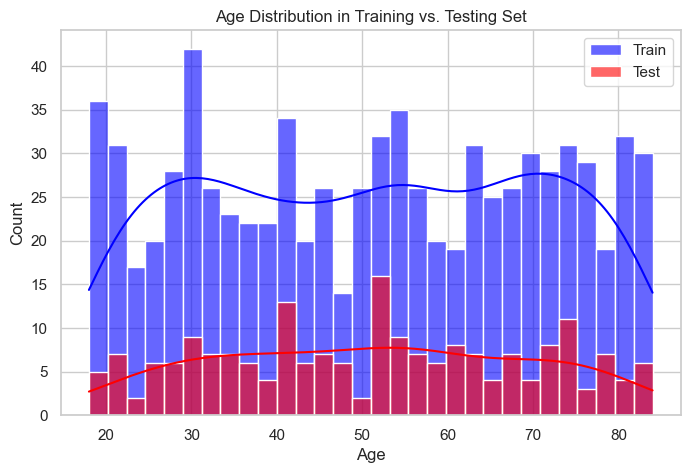

In [15]:
# Re-import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot Age Distribution in Training vs. Testing Set
plt.figure(figsize=(8, 5))
sns.histplot(X_train["Age"], bins=30, kde=True, color="blue", label="Train", alpha=0.6)
sns.histplot(X_test["Age"], bins=30, kde=True, color="red", label="Test", alpha=0.6)
plt.title("Age Distribution in Training vs. Testing Set")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


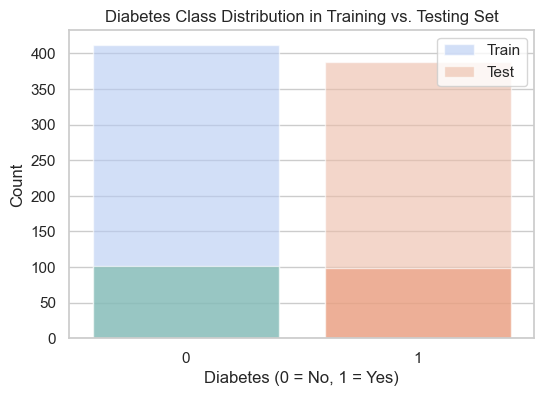

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, hue=y_train, palette="coolwarm", alpha=0.6)
sns.countplot(x=y_test, hue=y_test, palette="Set2", alpha=0.6)
plt.title("Diabetes Class Distribution in Training vs. Testing Set")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["Train", "Test"])
plt.show()


In [17]:
# Define features and target
X = df.drop(columns=['Diabetes_Status'])
y = df['Diabetes_Status']

In [18]:
# Identify categorical and numerical columns
categorical_cols = ['Diet_Quality', 'Physical_Activity_Level', 'Smoking_Status', 'Family_History']
numerical_cols = ['Glucose_Level', 'Insulin_Level', 'BMI', 'Age', 'HbA1c']


In [19]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values (if any)
    ('scaler', StandardScaler())  # Scale numerical features
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])


In [20]:
# Combine Pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [21]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#Model Pipeline with Hyperparameter Tuning
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
#Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [ ]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
#Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
#Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
